# Twitter Dataset Introduction

In [64]:
import pandas as pd
#Read in the tweets dataset
tweets = pd.read_excel("Data/stockerbot-export.xls")
print(tweets)

                        id                                               text  \
0      1019696670777500032  VIDEO: â€œI was in my office. I was minding my...   
1      1019709091038540032  The price of lumber $LB_F is down 22% since hi...   
2      1019711413798029952  Who says the American Dream is dead? https://t...   
3      1019716662587740032  Barry Silbert is extremely optimistic on bitco...   
4      1019718460287379968  How satellites avoid attacks and space junk wh...   
...                    ...                                                ...   
28434  1019730088617629952         $FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9   
28435  1019730115524280064  ã€ä»®æƒ³é€šè²¨ã€‘ãƒ“ãƒƒãƒˆã‚³ã‚¤ãƒ³ã®ä¾¡æ ¼ä...   
28436  1019730115805180032  RT @invest_in_hd: 'Nuff said!  $TEL #telcoin #...   
28437  1019730117252339968  ã€ä»®æƒ³é€šè²¨ã€‘ãƒ“ãƒƒãƒˆã‚³ã‚¤ãƒ³ã®ä¾¡æ ¼ä...   
28438  1019730146180409984  Stellar $XLM price: $0.297852 Binance registra...   

                           

In [65]:
#What are the most common tickers?
value_counts = tweets["symbols"].value_counts()
print(value_counts)

NFLX             101
ES               100
MOMO             100
AMAT             100
GPS              100
                ... 
ORCL               1
TWTR               1
INTC-USB           1
FB-GOOGL-GOOG      1
GS                 1
Name: symbols, Length: 453, dtype: int64


In [66]:
#There are combination tickers, but there are so few that it is not worth including in the analysis
i = value_counts.index.str.contains("-")
print(value_counts.loc[i])

AMZN-GPS         1
INTC-USB         1
FB-GOOGL-GOOG    1
Name: symbols, dtype: int64


In [67]:
#Let's take an example of the tweet text
print(tweets["text"].iloc[0])

VIDEO: â€œI was in my office. I was minding my own business...â€ â€“David Solomon tells $GS interns how he learned he waâ€¦ https://t.co/QClAITywXV


In [68]:
#What are Netflix's tweets
print(tweets[tweets["symbols"] == "NFLX"]['text'].iloc[0])

Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg


In [69]:
import re
#The $ can be used to reference different stocks
#Using regular expressions we can parse out connections
for x in tweets[tweets["symbols"] == "NFLX"]['text']:
    print(re.findall("\$[a-zA-Z]+", x))

[]
['$NFLX']
[]
['$FANG', '$FB', '$AMZN']
['$SPY', '$NFLX', '$UVXY', '$MS', '$CSX', '$ABT', '$UAL']
['$HMNY', '$AMD', '$MU']
['$NFLX']
['$CL']
['$FANG', '$FB', '$AMZN']
['$TWTR', '$FB', '$AAPL', '$NFLX', '$TSLA', '$AMZN', '$GOOGL']
['$TSLA']
['$NFLX', '$BAC', '$FB', '$MSFT', '$AAPL', '$MSFT', '$TWTR', '$BABA', '$TWTR', '$JD', '$NXPI', '$AMD', '$JPM', '$MU', '$TSLA', '$MS', '$C', '$ROKU', '$CSX']
['$FANG', '$FB', '$AMZN']
['$ABMD', '$CRM', '$PANW', '$TWTR', '$ALGN', '$NOW', '$FB', '$NFLX', '$ILMN', '$MA', '$V', '$LULU', '$ADBE', '$GOOGL', '$ISRG', '$A']
['$NFLX']
['$MS', '$BAC', '$CPAH']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
[]
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '$DIS']
['$TSLA', '$NFLX', '$BIDU', '$BABA', '$GOOGL', '$DIS']
['$SPY', '$NFLX', '$UVXY', '$MS', '$CSX', '$ABT', '$UAL']
['$NFLX']
['$AAPL', '$AMZN', '$NFLX', '$GOOGL', '$SPX', '$TWTR']
['$SPOT', '$NFLX', '$SIRI']
['$NFLX', '$SIRI', '$SPOT', '$T', '$AMZN', '

In [70]:
#It is not difficult to apply the regular expression to the dataframe
print(tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)))

8                                                       []
26391                                              [$NFLX]
26398                                                   []
26411                                  [$FANG, $FB, $AMZN]
26414          [$SPY, $NFLX, $UVXY, $MS, $CSX, $ABT, $UAL]
                               ...                        
28201                                              [$NFLX]
28241                                       [$TSLA, $NFLX]
28274                  [$NFLX, $AMZN, $ADDYY, $AAPL, $DIS]
28290    [$AMZN, $GOOGL, $NFLX, $BA, $TSLA, $TWTR, $SQ,...
28412         [$SQ, $NFLX, $AMZN, $AMD, $TSLA, $AAPL, $GS]
Name: text, Length: 101, dtype: object


In [71]:
#And we can convert it to a boolean index signifying connections by mapping the arrays to series
print(tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(x))))

       $NFLX  $AMZN  $FB  $FANG  $UAL  $SPY  $CSX  $MS  $ABT  $UVXY  ...  \
8        NaN    NaN  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
26391    1.0    NaN  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
26398    NaN    NaN  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
26411    NaN    1.0  1.0    1.0   NaN   NaN   NaN  NaN   NaN    NaN  ...   
26414    1.0    NaN  NaN    NaN   1.0   1.0   1.0  1.0   1.0    1.0  ...   
...      ...    ...  ...    ...   ...   ...   ...  ...   ...    ...  ...   
28201    1.0    NaN  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
28241    1.0    NaN  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
28274    1.0    1.0  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
28290    1.0    1.0  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   
28412    1.0    1.0  NaN    NaN   NaN   NaN   NaN  NaN   NaN    NaN  ...   

       $ibm  $nvda  $aapl  $nwl  $amzn  $goog  $ADDYY  $WIX  $BA  $SQ  
8       NaN    

In [72]:
#Just don't forget to fill the null values with 0
test = tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(x))).fillna(0)
print(test)

       $NFLX  $AMZN  $FB  $FANG  $UAL  $SPY  $CSX  $MS  $ABT  $UVXY  ...  \
8        0.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
26391    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
26398    0.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
26411    0.0    1.0  1.0    1.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
26414    1.0    0.0  0.0    0.0   1.0   1.0   1.0  1.0   1.0    1.0  ...   
...      ...    ...  ...    ...   ...   ...   ...  ...   ...    ...  ...   
28201    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
28241    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
28274    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
28290    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   
28412    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...   

       $ibm  $nvda  $aapl  $nwl  $amzn  $goog  $ADDYY  $WIX  $BA  $SQ  
8       0.0    

In [73]:
#Map takes a function and applies it over a list
list(map(str.lower, ["A", "a"]))

['a', 'a']

In [74]:
#So let's apply it so that we can normalize the tickers to all be uppercase
test = tweets[tweets["symbols"] == "NFLX"]['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(map(str.upper, x)))).fillna(0)
print(test)

       $NFLX  $AMZN  $FB  $FANG  $UAL  $SPY  $CSX  $MS  $ABT  $UVXY  ...  $RH  \
8        0.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
26391    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
26398    0.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
26411    0.0    1.0  1.0    1.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
26414    1.0    0.0  0.0    0.0   1.0   1.0   1.0  1.0   1.0    1.0  ...  0.0   
...      ...    ...  ...    ...   ...   ...   ...  ...   ...    ...  ...  ...   
28201    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
28241    1.0    0.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
28274    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
28290    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   
28412    1.0    1.0  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  ...  0.0   

       $IFN  $EROS  $EPI  $

In [75]:
#What are the most commonly cross-referenced for Netflix?
test = test.sum()
print(test)

$NFLX     69.0
$AMZN     33.0
$FB       25.0
$FANG      9.0
$UAL       6.0
          ... 
$NWL       1.0
$ADDYY     2.0
$WIX       1.0
$BA        1.0
$SQ        2.0
Length: 77, dtype: float64


In [76]:
#Let's turn this into a function
def find_outward_connections(tweets):
    return tweets['text'].apply(lambda x: re.findall("\$[a-zA-Z]+", x)).apply(lambda x: pd.Series(1, index=set(map(str.upper, x)))).fillna(0).sum()
print(find_outward_connections(tweets[tweets["symbols"] == "NFLX"]))

$NFLX     69.0
$AMZN     33.0
$FB       25.0
$FANG      9.0
$UAL       6.0
          ... 
$NWL       1.0
$ADDYY     2.0
$WIX       1.0
$BA        1.0
$SQ        2.0
Length: 77, dtype: float64


In [77]:
#And now with the function let's apply for each source ticker
connections = tweets.groupby("symbols").apply(find_outward_connections)
print(connections)

symbols         
A        $A         73.0
         $ION        1.0
         $R          1.0
         $BAM        5.0
         $ONE        6.0
                    ... 
ZTS      $OKTA       1.0
         $EW         1.0
         $OLLI       1.0
         $ANSS       1.0
ticker   $TICKER     1.0
Length: 23047, dtype: float64


In [78]:
#Do some cleaning up
connections = connections.reset_index()
connections.columns = ["Source", "Target", "N"]
connections

,Source,Target,N
0,A,$A,73.0
1,A,$ION,1.0
2,A,$R,1.0
3,A,$BAM,5.0
4,A,$ONE,6.0
...,...,...,...
23042,ZTS,$OKTA,1.0
23043,ZTS,$EW,1.0
23044,ZTS,$OLLI,1.0
23045,ZTS,$ANSS,1.0


In [79]:
#More fixing, get rid of the dollar signs
connections["Target"] = connections["Target"].str.replace("$","")
connections

,Source,Target,N
0,A,A,73.0
1,A,ION,1.0
2,A,R,1.0
3,A,BAM,5.0
4,A,ONE,6.0
...,...,...,...
23042,ZTS,OKTA,1.0
23043,ZTS,EW,1.0
23044,ZTS,OLLI,1.0
23045,ZTS,ANSS,1.0


In [80]:
#Pivot to get matrix form
connections = connections.pivot("Target", "Source", "N")
connections

Source,A,AABA,AAL,AAOI,AAP,AAPL,ABBV,ABC,ABEV,ABT,...,XOM,XRAY,XRX,XYL,YNDX,YUM,ZBH,ZNGA,ZTS,ticker
Target,,,,,,,,,,,,,,,,,,,,,
A,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AABA,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAC,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZYME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Fill the null values
connections = connections.fillna(0)

In [82]:
#An example of connections we might want to see: the FAANG stocks
#We will use reindex instead of loc in case one of the columns or indices is missing
FAANG =["FB","AAPL","AMZN","NFLX","GOOG"]
print(connections.reindex(index=FAANG, columns=FAANG).fillna(0))

Source    FB  AAPL  AMZN  NFLX  GOOG
Target                              
FB      50.0   0.0   0.0  25.0  10.0
AAPL     1.0  24.0   0.0  18.0  10.0
AMZN     1.0   0.0   0.0  33.0  14.0
NFLX     0.0   0.0   0.0  69.0   3.0
GOOG     0.0   0.0   0.0   1.0  70.0


In [83]:
#Which are the most referenced stocks?
print(connections.sum(axis=1).sort_values(ascending=False))

Target
NFLX     672.0
AMZN     533.0
SPY      454.0
FB       454.0
MSFT     414.0
         ...  
CRE        1.0
NATI       1.0
CRES       1.0
CRESY      1.0
ZZC        1.0
Length: 5171, dtype: float64


In [84]:
#And which reference the most other tickers?
print(connections.sum().sort_values(ascending=False))

Source
SQQQ      1353.0
CTAS       920.0
ESS        890.0
HCP        872.0
ERIC       762.0
           ...  
TSS         12.0
CMS         12.0
M            2.0
GS           1.0
ticker       1.0
Length: 448, dtype: float64


In [85]:
#Recall the behavior of stack
print(connections.stack())

Target  Source
A       A         73.0
        AABA       0.0
        AAL        0.0
        AAOI       0.0
        AAP        0.0
                  ... 
ZZC     YUM        0.0
        ZBH        0.0
        ZNGA       0.0
        ZTS        0.0
        ticker     0.0
Length: 2316608, dtype: float64


In [86]:
#We can find unique connections in this way:
print((connections.stack() > 0).sum())

23047


In [87]:
#Let's find the cdf of size of each unique connection between tickers
#First stack and sort
unique_connections = connections.stack()
unique_connections = unique_connections[unique_connections > 0]
unique_connections = unique_connections.sort_values()
cdf = pd.Series(list(range(1,len(unique_connections)+1)), index=unique_connections)
print(cdf)

1.0         1
1.0         2
1.0         3
1.0         4
1.0         5
        ...  
89.0    23043
90.0    23044
90.0    23045
94.0    23046
95.0    23047
Length: 23047, dtype: int64


In [88]:
#Dividing by the length of the unique connections will give the cdf
cdf = cdf / len(unique_connections)
cdf

1.0     0.000043
1.0     0.000087
1.0     0.000130
1.0     0.000174
1.0     0.000217
          ...   
89.0    0.999826
90.0    0.999870
90.0    0.999913
94.0    0.999957
95.0    1.000000
Length: 23047, dtype: float64

In [89]:
#Because there are repeats of the connection size we will take the maximum of the cdf value for each of the connection sizes
cdf = cdf.groupby(cdf.index).max()
print(cdf)

1.0     0.601076
2.0     0.771771
3.0     0.843971
4.0     0.882110
5.0     0.908578
          ...   
88.0    0.999740
89.0    0.999826
90.0    0.999913
94.0    0.999957
95.0    1.000000
Length: 91, dtype: float64


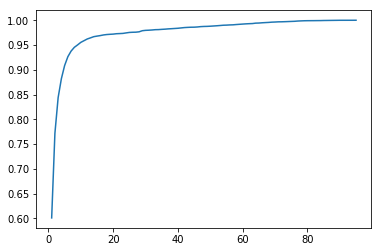

In [90]:
import matplotlib.pyplot as plt
#And plot this
cdf.plot(kind='line')
plt.show()

# Network Visualization

In [91]:
#First, let's get the top 5 firms that link to netflix to build a network graph
nflx_target = connections.loc["NFLX"]
nflx_target = nflx_target.sort_values(ascending=False)
print(nflx_target.head(6))

Source
NFLX    69.0
GNTX    48.0
CTAS    35.0
SIRI    26.0
HON     24.0
ISRG    19.0
Name: NFLX, dtype: float64


In [92]:
#Build the first level
first_level = nflx_target.head(6).reset_index()
first_level.columns = ["Source", "Connections"]
first_level["Target"] = "NFLX"
print(first_level)

  Source  Connections Target
0   NFLX         69.0   NFLX
1   GNTX         48.0   NFLX
2   CTAS         35.0   NFLX
3   SIRI         26.0   NFLX
4    HON         24.0   NFLX
5   ISRG         19.0   NFLX


In [93]:
#For the second we will iterate through each source but skip over netflix since we already did it
#We will also limit to 6 to keep it readable
second_level = []
for x in first_level["Source"]:
    if x == "NFLX":
        pass
    else:
        target = connections.loc[x]
        target = target.sort_values(ascending=False)
        target = target[target>0].head(6)
        target = target.reset_index()
        target.columns = ["Source", "Connections"]
        target["Target"] = x
        second_level.append(target)
second_level = pd.concat(second_level)
print(second_level)

  Source  Connections Target
0   GNTX         35.0   GNTX
1   TRIP          1.0   GNTX
0   CTAS         36.0   CTAS
1    KSU         29.0   CTAS
2    COF         10.0   CTAS
3     ED          7.0   CTAS
4   IDXX          5.0   CTAS
5    MKC          5.0   CTAS
0   SIRI         39.0   SIRI
1   FNSR          9.0   SIRI
2   AMAT          7.0   SIRI
3   NFLX          6.0   SIRI
4   VIAB          5.0   SIRI
5   SBUX          5.0   SIRI
0    HON         54.0    HON
1    KSU         28.0    HON
2    COF         10.0    HON
3   CTAS          8.0    HON
4    COL          8.0    HON
5    HUM          4.0    HON
0   ISRG         59.0   ISRG
1   CTAS         33.0   ISRG
2   IDXX         11.0   ISRG
3    HON         10.0   ISRG
4    MKC          5.0   ISRG
5    TJX          2.0   ISRG


In [94]:
#Let's also create a third level
#We will also do the same filtering of already analyzed targets
third_level = []
for x in second_level["Source"]:
    if x in first_level["Target"] or x in second_level["Target"]:
        pass
    else:
        target = connections.loc[x]
        target = target.sort_values(ascending=False)
        target = target[target>0].head(6)
        target = target.reset_index()
        target.columns = ["Source", "Connections"]
        target["Target"] = x
        third_level.append(target)
third_level = pd.concat(third_level)
print(third_level)

   Source  Connections Target
0    GNTX         35.0   GNTX
1    TRIP          1.0   GNTX
0    TRIP         79.0   TRIP
1      XL          7.0   TRIP
2     MHK          4.0   TRIP
..    ...          ...    ...
1     MHK         14.0    TJX
2    ROST          6.0    TJX
3     ODP          4.0    TJX
4     AZO          4.0    TJX
5     PEG          3.0    TJX

[131 rows x 3 columns]


In [95]:
! pip install networkx

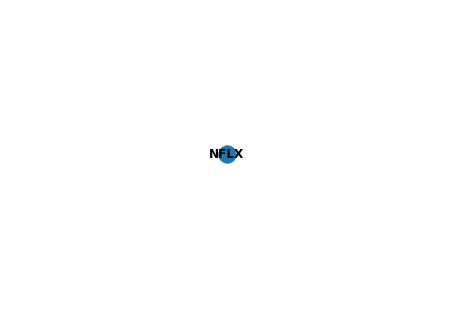

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
#Initialize the graph
G = nx.Graph()
#Add a node
G.add_node("NFLX")
#Draw and show the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

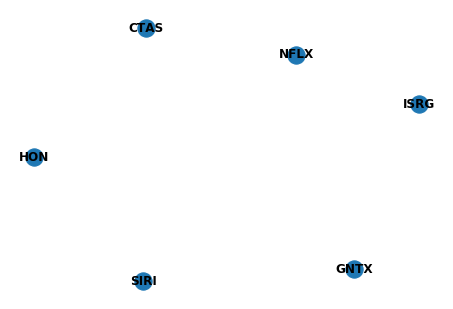

In [97]:
#Draw all nodes for the first and second level
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

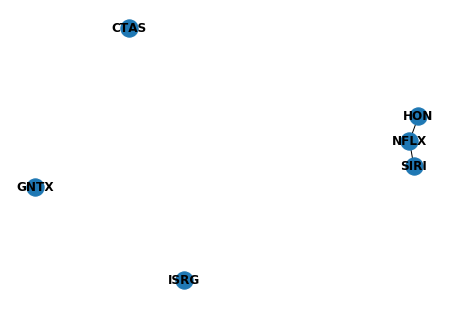

In [98]:
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
#An example of how to draw connections between nodes
G.add_edges_from([["NFLX", "HON"], ["NFLX", "SIRI"]])
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

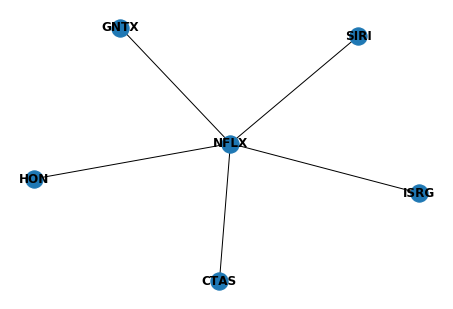

In [99]:
#Put it together for the first level connections
G = nx.Graph()
for node in set(list(first_level["Target"]) + list(first_level["Source"])):
    G.add_node(node)
G.add_edges_from(first_level[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

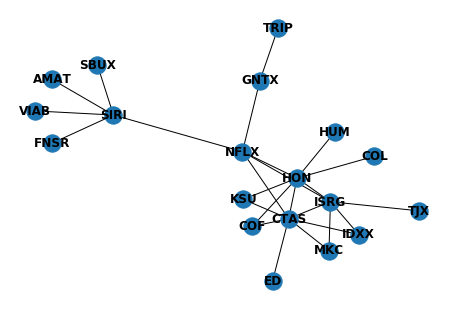

In [100]:
G = nx.Graph()
#Create a dataframe which holds first level and second level
graph_nodes = pd.concat([first_level, second_level])
for node in set(list(graph_nodes["Target"]) + list(graph_nodes["Source"])):
    G.add_node(node)
G.add_edges_from(graph_nodes[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

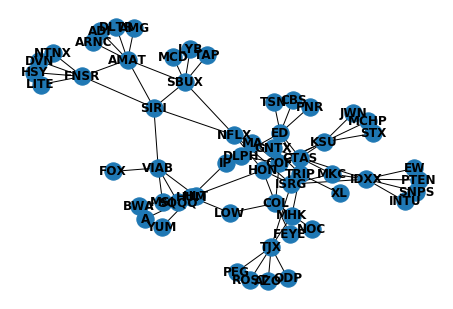

In [101]:
#Extend to the third level
G = nx.Graph()
graph_nodes = pd.concat([first_level, second_level, third_level])
for node in set(list(graph_nodes["Target"]) + list(graph_nodes["Source"])):
    G.add_node(node)
G.add_edges_from(graph_nodes[["Source", "Target"]].values)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Replicating PageRank

In [102]:
#Let's begin with four nodes, we can think of these as web pages
#A has links to B, C, D.... B links to A, D and so on
out_bound_connections = {"A": ["B", "C", "D"],
                        "B": ["A", "D"],
                        "C":["A"],
                        "D": ["C", "B"]}

In [103]:
#The page rank starts equally for each page
page_rank = {"A": .25, "B": .25, "C": .25, "D": .25}

In [104]:
#Using the page rank we can iterate through each page and see how they transfer their page rank to others
#Let's see how one iteration of page rank would work
new_page_rank = {"A": 0, "B": 0, "C": 0, "D": 0}
for node in out_bound_connections.keys():
    print("Node: {}".format(node))
    print("Page Rank:")
    print(page_rank[node])
    print("Out Connections:")
    print(out_bound_connections[node])
    for connected_node in out_bound_connections[node]:
        new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node]
    print("New page ranks at most recent step:")
    print(new_page_rank)
    print()
print("Final page rank:")
print(new_page_rank)

Node: A
Page Rank:
0.25
Out Connections:
['B', 'C', 'D']
New page ranks at most recent step:
{'A': 0, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.08333333333333333}

Node: B
Page Rank:
0.25
Out Connections:
['A', 'D']
New page ranks at most recent step:
{'A': 0.125, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.20833333333333331}

Node: C
Page Rank:
0.25
Out Connections:
['A']
New page ranks at most recent step:
{'A': 0.375, 'B': 0.08333333333333333, 'C': 0.08333333333333333, 'D': 0.20833333333333331}

Node: D
Page Rank:
0.25
Out Connections:
['C', 'B']
New page ranks at most recent step:
{'A': 0.375, 'B': 0.20833333333333331, 'C': 0.20833333333333331, 'D': 0.20833333333333331}

Final page rank:
{'A': 0.375, 'B': 0.20833333333333331, 'C': 0.20833333333333331, 'D': 0.20833333333333331}


In [105]:
#Adding a damping factor can be done in the following way
page_rank = {"A": .25, "B": .25, "C": .25, "D": .25}
damping_factor = .85
new_page_rank = {}
for node_name in ["A", "B", "C", "D"]:
    new_page_rank[node_name] = (1-damping_factor) /4
print("Starting page ranks before adding:")
print(new_page_rank)
print()
for node in out_bound_connections.keys():
    print("Node: {}".format(node))
    print("Page Rank:")
    print(page_rank[node])
    print("Out Connections:")
    print(out_bound_connections[node])
    for connected_node in out_bound_connections[node]:
        new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node] * damping_factor
    print("Updated page ranks at most recent step:")
    print(new_page_rank)
    print()
print("Final page rank:")
print(new_page_rank)

Starting page ranks before adding:
{'A': 0.037500000000000006, 'B': 0.037500000000000006, 'C': 0.037500000000000006, 'D': 0.037500000000000006}

Node: A
Page Rank:
0.25
Out Connections:
['B', 'C', 'D']
Updated page ranks at most recent step:
{'A': 0.037500000000000006, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.10833333333333334}

Node: B
Page Rank:
0.25
Out Connections:
['A', 'D']
Updated page ranks at most recent step:
{'A': 0.14375, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.21458333333333335}

Node: C
Page Rank:
0.25
Out Connections:
['A']
Updated page ranks at most recent step:
{'A': 0.35624999999999996, 'B': 0.10833333333333334, 'C': 0.10833333333333334, 'D': 0.21458333333333335}

Node: D
Page Rank:
0.25
Out Connections:
['C', 'B']
Updated page ranks at most recent step:
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}

Final page rank:
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C':

In [106]:
#And how we can formalize into a function
def compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor):
    new_page_rank = {}
    for node_name in ["A", "B", "C", "D"]:
        new_page_rank[node_name] = (1-damping_factor) / len(node_names)
    for node in out_bound_connections.keys():
        for connected_node in out_bound_connections[node]:
            new_page_rank[connected_node] += (1 / len(out_bound_connections[node])) * page_rank[node] * damping_factor
    return new_page_rank

node_names = ["A", "B", "C", "D"]
page_rank = {}
for node_name in node_names:
        page_rank[node_name] = (1) / len(node_names)
print(page_rank)
print(compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor))

{'A': 0.25, 'B': 0.25, 'C': 0.25, 'D': 0.25}
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}


In [107]:
#Watch what happens when we keep iterating
node_names = ["A", "B", "C", "D"]
damping_factor = .85
page_rank = {}
for node_name in node_names:
        page_rank[node_name] = 1 / len(node_names)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)
page_rank = compute_page_rank(node_names, out_bound_connections, page_rank, damping_factor)
print(page_rank)

{'A': 0.25, 'B': 0.25, 'C': 0.25, 'D': 0.25}
{'A': 0.35624999999999996, 'B': 0.21458333333333335, 'C': 0.21458333333333335, 'D': 0.21458333333333335}
{'A': 0.31109375000000006, 'B': 0.22963541666666665, 'C': 0.22963541666666665, 'D': 0.22963541666666665}
{'A': 0.33028515625, 'B': 0.22323828125, 'C': 0.22323828125, 'D': 0.22323828125}
{'A': 0.32212880859375004, 'B': 0.22595706380208333, 'C': 0.22595706380208333, 'D': 0.22595706380208333}


In [108]:
import pandas as pd

#Now let's move beyond dictionaries into matrix form
#First denote each column as what a ticker points to
#So column A has 1 for B, C, D since it points out to them
connection_matrix = pd.DataFrame([[0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 0, 1],
 [1, 1, 0, 0]],
                               index = ["A", "B", "C", "D"],
                               columns = ["A", "B", "C", "D"])
print(connection_matrix)
print()
#Normalize by total number of connections out for each column
connection_matrix = connection_matrix / connection_matrix.sum()
print(connection_matrix)

   A  B  C  D
A  0  1  1  0
B  1  0  0  1
C  1  0  0  1
D  1  1  0  0

          A    B    C    D
A  0.000000  0.5  1.0  0.0
B  0.333333  0.0  0.0  0.5
C  0.333333  0.0  0.0  0.5
D  0.333333  0.5  0.0  0.0


In [109]:
#Now, there is a vector for page rank
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
print(page_rank_vector)

A    0.25
B    0.25
C    0.25
D    0.25
dtype: float64


In [110]:
#A row times the page rank vector would denote what the new page rank would be
#In this case without a damping factor
print(connection_matrix.loc["A"] * page_rank_vector)
print()
print((connection_matrix.loc["A"] * page_rank_vector).sum())

A    0.000
B    0.125
C    0.250
D    0.000
dtype: float64

0.375


In [111]:
#And with matrix multiplication we can simply calculate all the new page ranks
print(connection_matrix.dot(page_rank_vector))

A    0.375000
B    0.208333
C    0.208333
D    0.208333
dtype: float64


           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.375000  0.208333  0.208333  0.208333
2   0.312500  0.229167  0.229167  0.229167
3   0.343750  0.218750  0.218750  0.218750
4   0.328125  0.223958  0.223958  0.223958
5   0.335938  0.221354  0.221354  0.221354
6   0.332031  0.222656  0.222656  0.222656
7   0.333984  0.222005  0.222005  0.222005
8   0.333008  0.222331  0.222331  0.222331
9   0.333496  0.222168  0.222168  0.222168
10  0.333252  0.222249  0.222249  0.222249
11  0.333374  0.222209  0.222209  0.222209
12  0.333313  0.222229  0.222229  0.222229
13  0.333344  0.222219  0.222219  0.222219
14  0.333328  0.222224  0.222224  0.222224
15  0.333336  0.222221  0.222221  0.222221
16  0.333332  0.222223  0.222223  0.222223
17  0.333334  0.222222  0.222222  0.222222
18  0.333333  0.222222  0.222222  0.222222
19  0.333333  0.222222  0.222222  0.222222
20  0.333333  0.222222  0.222222  0.222222


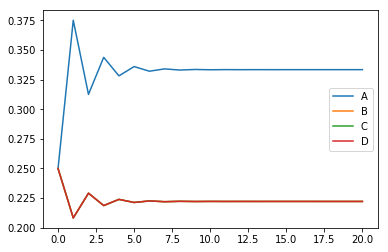

In [112]:
import matplotlib.pyplot as plt

#Let's see how the page ranks would eventually converge if not using a damping factor
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

In [113]:
#Alternatively, with a damping factor, we can calculate as so
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
damping_factor = .85

page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
print(page_rank_vector)

A    0.356250
B    0.214583
C    0.214583
D    0.214583
dtype: float64


           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.356250  0.214583  0.214583  0.214583
2   0.311094  0.229635  0.229635  0.229635
3   0.330285  0.223238  0.223238  0.223238
4   0.322129  0.225957  0.225957  0.225957
5   0.325595  0.224802  0.224802  0.224802
6   0.324122  0.225293  0.225293  0.225293
7   0.324748  0.225084  0.225084  0.225084
8   0.324482  0.225173  0.225173  0.225173
9   0.324595  0.225135  0.225135  0.225135
10  0.324547  0.225151  0.225151  0.225151
11  0.324567  0.225144  0.225144  0.225144
12  0.324559  0.225147  0.225147  0.225147
13  0.324563  0.225146  0.225146  0.225146
14  0.324561  0.225146  0.225146  0.225146
15  0.324562  0.225146  0.225146  0.225146
16  0.324561  0.225146  0.225146  0.225146
17  0.324561  0.225146  0.225146  0.225146
18  0.324561  0.225146  0.225146  0.225146
19  0.324561  0.225146  0.225146  0.225146
20  0.324561  0.225146  0.225146  0.225146


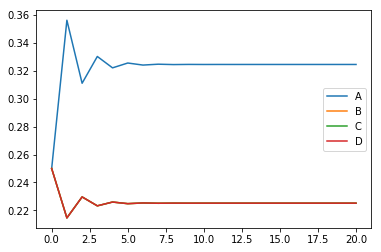

In [114]:
#And the same analysis
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

           A         B         C         D
0   0.250000  0.250000  0.250000  0.250000
1   0.462500  0.214583  0.108333  0.214583
2   0.311979  0.259740  0.168542  0.259740
3   0.401539  0.236283  0.125894  0.236283
4   0.345351  0.251690  0.151269  0.251690
5   0.380015  0.242318  0.135349  0.242318
6   0.358517  0.248156  0.145171  0.248156
7   0.371828  0.244546  0.139080  0.244546
8   0.363582  0.246783  0.142851  0.246783
9   0.368689  0.245398  0.140515  0.245398
10  0.365526  0.246256  0.141962  0.246256
11  0.367485  0.245724  0.141066  0.245724
12  0.366272  0.246054  0.141621  0.246054
13  0.367023  0.245850  0.141277  0.245850
14  0.366558  0.245976  0.141490  0.245976
15  0.366846  0.245898  0.141358  0.245898
16  0.366668  0.245946  0.141440  0.245946
17  0.366778  0.245916  0.141389  0.245916
18  0.366710  0.245935  0.141420  0.245935
19  0.366752  0.245923  0.141401  0.245923
20  0.366726  0.245931  0.141413  0.245931


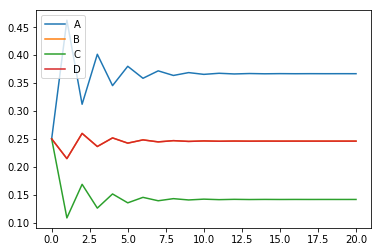

In [115]:
#Now what if D instead pointed only to A and B instead?
connection_matrix["D"] = [.5,.5,0,0]
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
page_rank_vectors = [page_rank_vector]
for _ in range(20):
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    page_rank_vectors.append(page_rank_vector)
page_rank_vectors = pd.DataFrame(page_rank_vectors)
print(page_rank_vectors)

page_rank_vectors.plot(kind='line')
plt.show()

In [116]:
import numpy as np
#Finally, we might want to not run x runs but instead run until the differences are extremely small
#Especially when we work with a larger dataset
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])

page_rank_vector_new = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)

#We can compute distance to see what the amount of change was
print(np.linalg.norm(page_rank_vector - page_rank_vector_new, 2))

0.2602582851707127


In [117]:
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
#You can see the differences get smaller and smaller
for _ in range(20):
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    print(np.linalg.norm(page_rank_vector - page_rank_vector_old, 2))

0.2602582851707127
0.1742404617138738
0.10459528337743093
0.06538909118334951
0.04038254437344823
0.025036346051860038
0.015503167955968757
0.00960363907809513
0.0059483863771457954
0.0036845024135567788
0.0022821983851974937
0.0014136098126658584
0.0008755988925999469
0.0005423517109634777
0.00033593617714347475
0.00020808106048124514
0.0001288867653688915
7.983330298136814e-05
4.94492684302312e-05
3.062919931683631e-05


In [118]:
page_rank_vector = pd.Series(.25, index = ["A", "B", "C", "D"])
#Start with a dummy old value
page_rank_vector_old = pd.Series(100, index = ["A", "B", "C", "D"])
i = 0
while np.linalg.norm(page_rank_vector - page_rank_vector_old, 2) > 1.0e-6:
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connection_matrix) + damping_factor * connection_matrix.dot(page_rank_vector)
    i+=1
print(page_rank_vector)
print("Took {} loops to converge".format(i))

A    0.366736
B    0.245928
C    0.141409
D    0.245928
dtype: float64
Took 28 loops to converge


In [119]:
#Let's re-visit the twitter dataset, recall our matrix...
print(connections)

Source     A  AABA  AAL  AAOI  AAP  AAPL  ABBV  ABC  ABEV  ABT  ...  XOM  \
Target                                                          ...        
A       73.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
AA       0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
AABA     0.0  56.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
AAC      0.0   0.0  0.0   0.0  0.0   0.0   1.0  0.0   0.0  0.0  ...  0.0   
AAGC     0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
...      ...   ...  ...   ...  ...   ...   ...  ...   ...  ...  ...  ...   
ZUO      0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
ZYB      0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
ZYME     0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
ZYNE     0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   
ZZC      0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  0.0   

Source  XRA

In [120]:
#Let's turn it into a binary matrix
connections_binary = connections.copy()
connections_binary[connections_binary > 0] = 1

#Reindex so that all index and column values are present
i = connections_binary.index.union(connections_binary.columns)
connections_binary = connections_binary.reindex(index=i, columns=i).fillna(0)

In [121]:
#We want to also eliminate diagonal elements

#First grab the indices present in the matrix
rows, cols = np.indices((len(connections_binary.columns), len(connections_binary.columns)))

#Diagonal elements indices
print(rows == cols)

mask = rows == cols
connections_binary = connections_binary.mask(mask).fillna(0)
print(connections_binary)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False  True]]
          A   AA  AABA  AAC  AAGC  AAL  AALY  AAME  AAN  AAOI  ...  ZSC  \
A       0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AA      0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AABA    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAC     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAGC    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
...     ...  ...   ...  ...   ...  ...   ...   ...  ...   ...  ...  ...   
ZYB     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ZYME    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ZYNE    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0

In [122]:
#Finally, normalize the columns to sum to 1
connections_binary = (connections_binary / connections_binary.sum()).fillna(0)
print(connections_binary)

          A   AA  AABA  AAC  AAGC  AAL  AALY  AAME  AAN  AAOI  ...  ZSC  \
A       0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AA      0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AABA    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAC     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
AAGC    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
...     ...  ...   ...  ...   ...  ...   ...   ...  ...   ...  ...  ...   
ZYB     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ZYME    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ZYNE    0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ZZC     0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   
ticker  0.0  0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0   

        ZTCOY  ZTO  ZTS  ZUO  ZYB  ZYME  ZYNE  ZZC  ticker  
A         0.0  0.0  0.0  0.0  0.0   0.

In [123]:
page_rank_vector = pd.Series(1/len(connections_binary), index = connections_binary.index)
#Start with a dummy old value
page_rank_vector_old = pd.Series(100, index = connections_binary.index)
damping_factor = .85

i = 0
while np.linalg.norm(page_rank_vector - page_rank_vector_old, 2) > 1.0e-6:
    page_rank_vector_old = page_rank_vector
    page_rank_vector = (1-damping_factor)/len(connections_binary) + damping_factor * connections_binary.dot(page_rank_vector)
    i+=1
print(page_rank_vector.sort_values(ascending=False))
print("Took {} loops to converge".format(i))

AMZN      0.000251
IBM       0.000211
LINK      0.000204
MSFT      0.000203
NFLX      0.000152
            ...   
LUK       0.000029
RHI       0.000029
COO       0.000029
ALLE      0.000029
ticker    0.000029
Length: 5172, dtype: float64
Took 9 loops to converge
